In [1]:
import os
import sys
from os import listdir
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.image as mpimg
from matplotlib.image import imread

In [2]:
current_working_directory = os.getcwd()
print(current_working_directory)

/Users/ashwin/Padhai/Projects/RKT_BC


In [3]:
csv_path = "/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/meta.csv"
df_meta = pd.read_csv(csv_path)

In [4]:
dicom_data = pd.read_csv("/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/dicom_info.csv")
dicom_data.head(10)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
5,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,8,8,BREAST,1981,20160503,111620.055,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,82702.0
6,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,16,16,BREAST,393,20160503,111620.055,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,44323,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,215032.0
7,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,16,16,BREAST,611,20160503,122938.838,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,24057,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,215300.0
8,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,8,8,BREAST,3571,20160503,122938.838,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,84849.0
9,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,NaN,8,8,BREAST,2371,20160503,131321.302,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.411833492612373627114...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.407544576612957992910...,90204.0


In [5]:
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
image_dir = "/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/jpeg"
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]

'/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [7]:
cropped_images.shape

(3567,)

In [8]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[8]
    full_mammogram_dict[key] = dicom

for dicom in cropped_images:
    key = dicom.split("/")[8]
    cropped_dict[key] = dicom

for dicom in roi_mask_images:
    key = dicom.split("/")[8]
    roi_mask_dict[key] = dicom

In [9]:
mass_train_data = pd.read_csv("/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/mass_case_description_train_set.csv")
mass_test_data = pd.read_csv("/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/mass_case_description_test_set.csv")
calc_train_data = pd.read_csv("/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/calc_case_description_train_set.csv")
calc_test_data = pd.read_csv("/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/csv/calc_case_description_test_set.csv")

In [10]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [11]:
fix_image_path_mass(mass_train_data)
fix_image_path_mass(mass_test_data)
fix_image_path_calc(calc_test_data)
fix_image_path_calc(calc_train_data)

In [12]:
train_data = pd.concat([mass_train_data, calc_train_data], ignore_index=True)
test_data = pd.concat([mass_test_data, calc_test_data], ignore_index=True)

In [13]:
print(test_data.shape)
print(train_data.shape)

(704, 17)
(2864, 17)


In [14]:
test_data.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'breast density',
       'calc type', 'calc distribution'],
      dtype='object')

In [15]:
train_data = train_data[['cropped image file path', 'pathology']]
test_data = test_data[['cropped image file path', 'pathology']]

In [16]:
train_data = train_data.rename(columns={
    'cropped image file path': 'path',
})

test_data = test_data.rename(columns={
    'cropped image file path': 'path',
})

In [17]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [18]:
data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [19]:
data['pathology'].value_counts()

MALIGNANT                  1457
BENIGN                     1429
BENIGN_WITHOUT_CALLBACK     682
Name: pathology, dtype: int64

In [20]:
data['pathology'] = data['pathology'].replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN')

In [21]:
data['pathology'].value_counts()

BENIGN       2111
MALIGNANT    1457
Name: pathology, dtype: int64

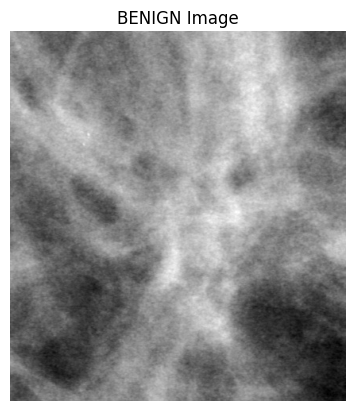

In [22]:
image = imread(data[data['pathology'] == 'BENIGN']['path'].iloc[0])

plt.imshow(image, cmap='gray')
plt.title('BENIGN Image')
plt.axis('off')
plt.show()

In [23]:
data.shape

(3568, 2)

In [24]:
def filter_dataframe_by_base_directory(df):
    base_directory = '/Users/ashwin/Padhai/Projects/RKT_BC/MG_Dataset/jpeg/'

    # Check if all three columns start with the base directory
    mask = df['path'].str.startswith(base_directory)

    # Keep only the rows where all three columns start with the base directory
    filtered_df = df[mask]

    return filtered_df

In [25]:
data = filter_dataframe_by_base_directory(data)

In [26]:
data.shape

(3566, 2)

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['pathology'] = label_encoder.fit_transform(data['pathology'])

In [28]:
from PIL import Image
import torch
from torchvision import transforms

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),  # Ensure that the image is loaded as grayscale
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Adjust for grayscale images
])

# Function to load and preprocess the image
def load_and_preprocess_image(file_path):
    # Read image using PIL
    img = Image.open(file_path)
    
    # Apply transformations
    img = transform(img)

    return img

# Apply the function to the 'path' column
data['image'] = data['path'].apply(load_and_preprocess_image)

In [29]:
data['pathology'].value_counts()

0    2110
1    1456
Name: pathology, dtype: int64

In [30]:
from imblearn.over_sampling import RandomOverSampler

X = data['image'].values.reshape(-1, 1)
y = data['pathology']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_data = pd.DataFrame({'image': X_resampled.flatten(), 'pathology': y_resampled})

In [31]:
balanced_data['pathology'].value_counts()

1    2110
0    2110
Name: pathology, dtype: int64

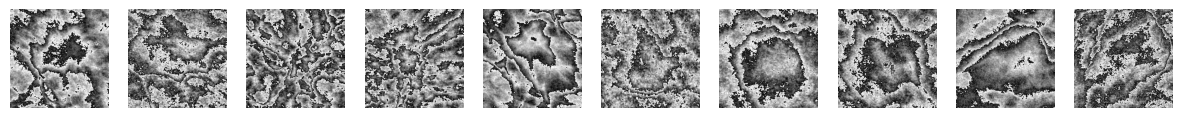

In [32]:
import matplotlib.pyplot as plt
import torchvision

num_samples_to_visualize = 10
subset_data = balanced_data.head(num_samples_to_visualize)

fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(15, 5))

for i, (_, row) in enumerate(subset_data.iterrows()):
    image_tensor = row['image']
    image_tensor = image_tensor.cpu() if image_tensor.device.type == 'cuda' else image_tensor
    image_array = torchvision.transforms.ToPILImage()(image_tensor)
    
    axes[i].imshow(image_array, cmap='gray')
    axes[i].axis('off')

plt.show()

In [33]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(balanced_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [34]:
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 3376
Validation set size: 422
Test set size: 422


In [59]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.batch_norm3 = nn.BatchNorm2d(128)


        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.batch_norm4 = nn.BatchNorm2d(256)


        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv3(x)
        x = self.batch_norm3(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv4(x)
        x = self.batch_norm4(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x


In [60]:
model = SimpleCNN()
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

26079937


In [61]:
from torchsummary import summary
summary(model, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
         MaxPool2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]          18,496
       BatchNorm2d-6         [-1, 64, 112, 112]             128
              ReLU-7         [-1, 64, 112, 112]               0
         MaxPool2d-8           [-1, 64, 56, 56]               0
            Conv2d-9          [-1, 128, 56, 56]          73,856
      BatchNorm2d-10          [-1, 128, 56, 56]             256
             ReLU-11          [-1, 128, 56, 56]               0
        MaxPool2d-12          [-1, 128, 28, 28]               0
           Conv2d-13          [-1, 256, 28, 28]         295,168
      BatchNorm2d-14          [-1, 256,

In [62]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

In [63]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'image': self.data.iloc[idx]['image'], 'label': self.data.iloc[idx]['pathology']}
        
        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample

In [64]:
train_data['image'] = train_data['image'].apply(lambda x: transform(x))
val_data['image'] = val_data['image'].apply(lambda x: transform(x))
test_data['image'] = test_data['image'].apply(lambda x: transform(x))

In [65]:
train_dataset = CustomDataset(train_data, transform=None)
val_dataset = CustomDataset(val_data, transform=None)
test_dataset = CustomDataset(test_data, transform=None)

In [66]:
train_dataset

In [67]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [68]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
    x = torch.ones(1, device=device)
    print(x)
else:
    print("MPS device not found")

tensor([1.], device='mps:0')


In [71]:
model = SimpleCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [72]:
from tqdm import tqdm 

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False)

    for batch in progress_bar:
        images, labels = batch['image'].to(device), batch['label'].float().unsqueeze(1).to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        predictions = (outputs >= 0.5).float()
        correct_predictions += torch.sum(predictions == labels).item()
        total_samples += labels.size(0)

        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'Loss': loss.item()})

    training_accuracy = correct_predictions / total_samples
    progress_bar.close()
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss}")

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    progress_bar = tqdm(val_loader, desc='Validation', leave=False)
    for batch in progress_bar:
        images, labels = batch['image'].to(device), batch['label'].float().unsqueeze(1).to(device)
        outputs = model(images)
        
        predictions = (outputs >= 0.5).float()
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    progress_bar.close()

accuracy = accuracy_score(all_labels, all_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20, Loss: 0.8596075891323809


Epoch 2/20, Loss: 0.6098783145535667


Epoch 3/20, Loss: 0.579842523583826


Epoch 4/20, Loss: 0.4920249215836795


Epoch 5/20, Loss: 0.3415196005184695


Epoch 6/20, Loss: 0.24839141065219664


Epoch 7/20, Loss: 0.13962096046164352


Epoch 8/20, Loss: 0.08299537537232884


Epoch 9/20, Loss: 0.04526099188358716


Epoch 10/20, Loss: 0.02693789448799952


Epoch 11/20, Loss: 0.01764753701622194


Epoch 12/20, Loss: 0.012286005392319188


Epoch 13/20, Loss: 0.009455826361927221


Epoch 14/20, Loss: 0.007285050538210374


Epoch 15/20, Loss: 0.005750221955888676


Epoch 16/20, Loss: 0.004748419010660278


Epoch 17/20, Loss: 0.003938367080716592


Epoch 18/20, Loss: 0.003266862905496415


Epoch 19/20, Loss: 0.00283152129026657


Epoch 20/20, Loss: 0.0024028415945446433


Validation Accuracy: 72.51%


In [73]:
model.eval()
all_predictions_test = []
all_labels_test = []

with torch.no_grad():
    for batch in test_loader:
        images_test, labels_test = batch['image'].to(device), batch['label'].float().unsqueeze(1).to(device)
        outputs_test = model(images_test)
        
        predictions_test = (outputs_test >= 0.5).float()
        all_predictions_test.extend(predictions_test.cpu().numpy())
        all_labels_test.extend(labels_test.cpu().numpy())

accuracy_test = accuracy_score(all_labels_test, all_predictions_test)
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")

Testing Accuracy: 75.36%


: 